Stacking is a ensemble learning technique where the final model known as the **“stacked model"** combines the predictions from multiple base models. The goal is to create a stronger model by using different models and combining them.

## Architecture of Stacking

Stacking architecture is like a team of models working together in two layers to improve prediction accuracy. Each layer has a specific job and the process is designed to make the final result more accurate than any single model alone. It has two parts:

1. **Base Models (Level-0 Models)**: These are the individual models that are trained on the original dataset. They can be of different types, such as decision trees, logistic regression, support vector machines, etc.

2. **Meta-Model (Level-1 Model)**: This model is trained on the predictions made by the base models. The meta-model learns how to best combine the outputs of the base models to make a final prediction. Common choices for meta-models include linear regression, logistic regression, or more complex models.

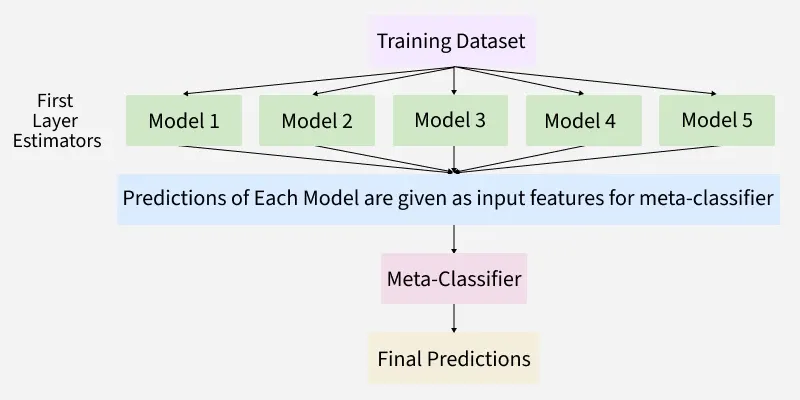

## Working of Stacking

The process can be summarized in the following steps:

* **Start with training data:** We begin with the usual training data that contains both input features and the target output.
* **Train base models:** The base models are trained on this training data. Each model tries to make predictions based on what it learns.
* **Generate predictions:** After training the base models make predictions on new data called validation data or out-of-fold data. These predictions are collected.
* **Train meta-model:** The meta-model is trained using the predictions from the base models as new features. The target output stays the same and the meta-model learns how to combine the base model predictions.
* **Final prediction:** When testing the base models make predictions on new, unseen data. These predictions are passed to the meta-model which then gives the final prediction.



## Implementation of Stacking

### Step 1: Importing the required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step 2: Load the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/gfg_heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Step 3: Splitting the Data into Training and Testing Sets

In [3]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Standardizing the Data

In [4]:
sc = StandardScaler()

var_transform = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[var_transform] = sc.fit_transform(X_train[var_transform])
X_test[var_transform] = sc.transform(X_test[var_transform])

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,-0.585840,1,2,-0.779454,-1.935031,0,0,-1.019094,0,-0.210661,2,3,2
137,1.051477,0,0,2.741732,1.610634,0,1,0.202882,1,-0.912152,2,0,2
534,-0.040068,0,2,-1.347387,0.442176,0,0,0.770228,0,-0.912152,2,0,2
495,0.505705,1,0,0.186033,-0.222636,0,1,0.508376,0,-0.473720,1,0,3
244,-0.367531,1,2,-0.381900,-0.001032,1,0,0.726586,0,1.192321,1,0,2


### Step 5: Building First Layer Estimators 

In [5]:
KNC = KNeighborsClassifier()
NB = GaussianNB()

### Step 6: Training and Evaluating KNeighborsClassifier

In [6]:
model_kNeighborsClassifier = KNC.fit(X_train, y_train)
pred_knc = model_kNeighborsClassifier.predict(X_test)

acc_knc = accuracy_score(y_test, pred_knc)
print("Accuracy of KNeighborsClassifier:", acc_knc*100)

Accuracy of KNeighborsClassifier: 80.48780487804879


### Step 7: Training and Evaluating Naive Bayes Classifier

In [7]:
model_NativeBayes = NB.fit(X_train, y_train)
pred_nb = model_NativeBayes.predict(X_test)

acc_nb = accuracy_score(y_test, pred_nb)
print("Accuracy of Naive Bayes:", acc_nb*100)

Accuracy of Naive Bayes: 80.0


### Step 8: Implementing Stacking Classifier

Now, we will combine the base models using a Stacking Classifier. The meta-model will be a logistic regression model which will take the predictions of KNN and Naive Bayes as input.

* StackingClassifier(): Combines base models and a meta-model.
* classifiers: List of base learners.
* meta_classifier: Model that learns from base learners’ predictions.
* use_probas=True: Passes probability outputs to the meta-model instead of class labels.

In [12]:
base_learners = [
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
]
meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, stack_method='predict_proba')

### Step 9: Training and Evaluating the Stacking Classifier

In [13]:
model_stack = stacking_model.fit(X_train, y_train)
pred_stack = model_stack.predict(X_test)

acc_stack = accuracy_score(y_test, pred_stack)
print("Accuracy of Stacking Classifier:", acc_stack*100)

Accuracy of Stacking Classifier: 84.8780487804878


Both individual models (KNN and Naive Bayes) achieved an accuracy of approximately 80%, while the stacked model achieved an accuracy of around 84.87%. This shows that combining the predictions of multiple models using stacking can slightly improve overall performance compared to using a single model.

## Advnantages and Disadvantages of Stacking
**Advantages:**
1. Improved Accuracy: By combining multiple models, stacking can often achieve better performance than any single model.
2. Flexibility: Different types of models can be used as base learners, allowing for a diverse set of predictions.
3. Reduced Overfitting: The meta-model can help mitigate overfitting by learning to weigh the base models appropriately.

**Disadvantages:**
1. Complexity: Stacking adds complexity to the model training process, making it harder to implement and understand.
2. Computational Cost: Training multiple models and a meta-model can be computationally expensive and time-consuming.
3. Risk of Overfitting: If not properly validated, the meta-model may overfit to the predictions of the base models, especially if they are highly correlated.
